In [1]:
#%matplotlib widget
%matplotlib inline

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
opm, info = open_model(root_pth/"zemax/tests/354710-C-Zemax(ZMX).zmx", info=True)

In [5]:
info

({'VERS': '140124 258 36214',
  'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0 1 1 0 0 0',
  'STANDARD': 5,
  'EVENASPH': 1,
  'CONI': 1,
  'conj type': 'infinite',
  '# surfs': 6,
  '# wvls': 1,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['LIGHTPATH', 'SCHOTT'],
  'encoding': 'utf-16'},
 {'BK7': "create_glass('N-BK7','Schott')",
  'D-ZK3M': "InterpolatedGlass('D-ZK3M', cat='LightPath', pairs=[(2352.4, 1.555),(1970.1, 1.561),(1529.6, 1.568),(1128.6, 1.573),(1014.0, 1.575),(852.1, 1.578),(706.5, 1.582),(656.3, 1.583),(643.8, 1.584),(632.8, 1.584),(589.3, 1.586),(587.6,1.586),(546.1, 1.589),(486.1, 1.593),(480.0, 1.594),(435.8, 1.598),(404.7, 1.602),(365.0, 1.610)])"})

In [6]:
opm, info = open_model(root_pth/"zemax/tests/354710-C-Zemax(ZMX).zmx", info=True)

In [7]:
info

({'VERS': '140124 258 36214',
  'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0 1 1 0 0 0',
  'STANDARD': 5,
  'EVENASPH': 1,
  'CONI': 1,
  'conj type': 'infinite',
  '# surfs': 6,
  '# wvls': 1,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['LIGHTPATH', 'SCHOTT'],
  'encoding': 'utf-16'},
 {'BK7': "create_glass('N-BK7','Schott')",
  'D-ZK3M': "InterpolatedGlass('D-ZK3M', cat='LightPath', pairs=[(2352.4, 1.555),(1970.1, 1.561),(1529.6, 1.568),(1128.6, 1.573),(1014.0, 1.575),(852.1, 1.578),(706.5, 1.582),(656.3, 1.583),(643.8, 1.584),(632.8, 1.584),(589.3, 1.586),(587.6,1.586),(546.1, 1.589),(486.1, 1.593),(480.0, 1.594),(435.8, 1.598),(404.7, 1.602),(365.0, 1.610)])"})

In [8]:
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

In [9]:
osp['wvls'].wavelengths

[1550.0]

In [10]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
 Stop:     1.182174     0.862527    D-ZK3M             1     0.75000
    2:     0.000000     0.523243       air             1     0.57417
    3:     0.000000     0.250000     N-BK7             1     0.24917
    4:     0.000000     0.249999       air             1     0.15527
  Img:     0.000000      0.00000                       1  8.9134e-06


In [11]:
pm.first_order_data()

efl                1.49
ffl               -1.49
pp1                  -0
bfl              0.2499
ppk                1.24
f/#              0.9933
m             -1.49e-10
red          -6.712e+09
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius         0.75
na obj          7.5e-11
n obj                 1
img_dist         0.2499
img_ht          0.02601
exp_dist          -1.24
exp_radius         0.75
na img          -0.4496
n img                 1
optical invariant      0.01309


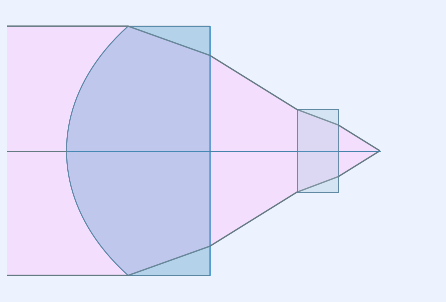

In [12]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

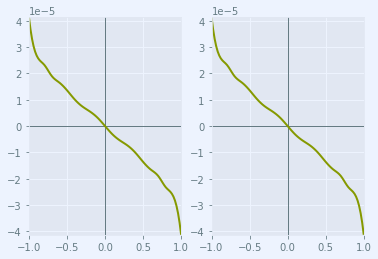

In [13]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.All_Same).plot()

In [14]:
osp['wvls'].set_from_list([[1050., 1], [1550., 2], [1700., 1]])
osp['wvls'].reference_wvl = 1

In [15]:
osp['wvls'].wavelengths

[1050.0, 1550.0, 1700.0]

In [16]:
opm.update_model()

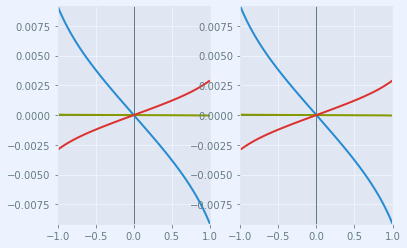

In [17]:
abr_plt.refresh()

In [18]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
 Stop:     1.182174     0.862527    D-ZK3M             1     0.75000
    2:     0.000000     0.523243       air             1     0.57417
    3:     0.000000     0.250000     N-BK7             1     0.24917
    4:     0.000000     0.249999       air             1     0.15527
  Img:     0.000000      0.00000                       1  8.9134e-06


In [19]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
 Stop:      1.18217                 
                    0.862527       D-ZK3M
    2:      0.00000                 
                    0.523243          air
    3:      0.00000                 
                    0.250000        N-BK7
    4:      0.00000                 
                    0.249999          air
  Img:      0.00000                 


In [20]:
listobj(sm.ifcs[1])

transmit
profile: EvenPolynomial
c=1.1821736792829385,   r=0.8458993949235631   conic cnst=-0.4776343430417
coefficients: [0.0, -0.006313587842251, -0.009394960901464, -0.01707674864971, 0.008070222726967, -0.02139444912229, 0.0, 0.0]
surface_od=0.75
radius=0.75



In [21]:
sm.ifcs[1].decenter = srf.DecenterData('decenter')
sm.ifcs[2].decenter = srf.DecenterData('reverse')

In [22]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
 Stop:      1.18217                            decenter     0.0000     0.0000
                    0.862527       D-ZK3M
    2:      0.00000                             reverse     0.0000     0.0000
                    0.523243          air
    3:      0.00000                 
                    0.250000        N-BK7
    4:      0.00000                 
                    0.249999          air
  Img:      0.00000                 


In [23]:
listobj(sm.ifcs[1])

transmit
profile: EvenPolynomial
c=1.1821736792829385,   r=0.8458993949235631   conic cnst=-0.4776343430417
coefficients: [0.0, -0.006313587842251, -0.009394960901464, -0.01707674864971, 0.008070222726967, -0.02139444912229, 0.0, 0.0]
decenter type: decenter
decenter: [0. 0. 0.]
euler angles: [0. 0. 0.]
surface_od=0.75
radius=0.75



In [24]:
sm.ifcs[1].decenter.dec[1] = .2
sm.ifcs[2].decenter.dec[1] = .2

In [25]:
listobj(sm.ifcs[1])

transmit
profile: EvenPolynomial
c=1.1821736792829385,   r=0.8458993949235631   conic cnst=-0.4776343430417
coefficients: [0.0, -0.006313587842251, -0.009394960901464, -0.01707674864971, 0.008070222726967, -0.02139444912229, 0.0, 0.0]
decenter type: decenter
decenter: [0.  0.2 0. ]
euler angles: [0. 0. 0.]
surface_od=0.75
radius=0.75



In [26]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
 Stop:      1.18217                            decenter    0.20000     0.0000
                    0.862527       D-ZK3M
    2:      0.00000                             reverse    0.20000     0.0000
                    0.523243          air
    3:      0.00000                 
                    0.250000        N-BK7
    4:      0.00000                 
                    0.249999          air
  Img:      0.00000                 


In [27]:
opm.add_dummy_plane(idx=0)

In [28]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
    1:      0.00000                 
                     0.00000          air
 Stop:      1.18217                            decenter    0.20000     0.0000
                    0.862527       D-ZK3M
    3:      0.00000                             reverse    0.20000     0.0000
                    0.523243          air
    4:      0.00000                 
                    0.250000        N-BK7
    5:      0.00000                 
                    0.249999          air
  Img:      0.00000                 


In [29]:
sm.cur_surface

1

In [30]:
sm.set_stop()

1

In [31]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
 Stop:      0.00000                 
                     0.00000          air
    2:      1.18217                            decenter    0.20000     0.0000
                    0.862527       D-ZK3M
    3:      0.00000                             reverse    0.20000     0.0000
                    0.523243          air
    4:      0.00000                 
                    0.250000        N-BK7
    5:      0.00000                 
                    0.249999          air
  Img:      0.00000                 


In [32]:
sm.list_decenters(full=True)

              thi    medium/mode          type          x          y       alpha      beta       gamma
    0:  1.00000e+10          air
    1:      0.00000          air
    2:                                  decenter     0.0000    0.20000     0.0000     0.0000     0.0000
    2:     0.862527       D-ZK3M
    3:                                   reverse     0.0000    0.20000     0.0000     0.0000     0.0000
    3:     0.523243          air
    4:     0.250000        N-BK7
    5:     0.249999          air
    6:                     dummy


In [33]:
opm.update_model()

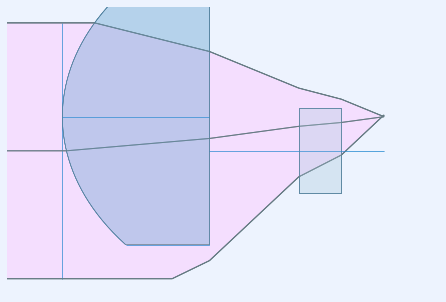

In [34]:
layout_plt.refresh()

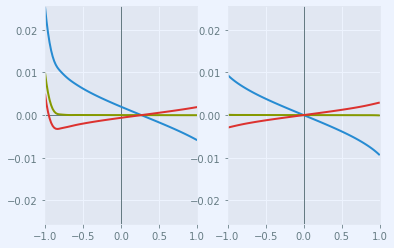

In [35]:
abr_plt.refresh()